# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

Summary of my topic: Exploring the Disparities in Internet Usage Among Older Adults
While the development of technology and the internet has brought convenience to our lives, the older generation is often left behind. The disparities in accessing information and resources among older adults are deepened by differences in racial background, socioeconomic status, education, and so forth. This project will focus on exploring the disparities in internet usage among older adults. 

In [142]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [143]:
#Import Dataset1: CSV document of 2022 AARP Healthy Living Survey of Adults Age 50 and Older
AARP = pd.read_csv('AARP2022.csv', 
                   usecols=['age', 'racethni', 'educ5', 'marital', 'state', 'metro', 'internet'],
                   encoding='ISO-8859-1') 
AARP

,age,racethni,educ5,marital,state,metro,internet
0,76,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Minnesota,Metro Area,Internet Household
1,86,"White, non-Hispanic",Bachelor's degree,Married,Pennsylvania,Metro Area,Internet Household
2,71,"White, non-Hispanic",HS graduate or equivalent,Separated,New Jersey,Metro Area,Internet Household
3,88,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Washington,Metro Area,Internet Household
4,72,"White, non-Hispanic",Post grad study/professional degree,Married,North Carolina,Metro Area,Internet Household
...,...,...,...,...,...,...,...
1959,53,Hispanic,Post grad study/professional degree,Divorced,Florida,Metro Area,Internet Household
1960,76,Hispanic,Post grad study/professional degree,Married,Florida,Metro Area,Internet Household
1961,73,Hispanic,Post grad study/professional degree,Separated,Florida,Metro Area,Internet Household
1962,60,Hispanic,Post grad study/professional degree,Married,Mississippi,Metro Area,Internet Household


In [144]:
!pip install requests pandas

In [145]:
#Import Dataset2: API of Census data --- ACS 2022 
import requests
import pandas as pd

# Construct the API request URL
# The variables of total population from each race are selected
url = "https://api.census.gov/data/2022/acs/acs1?get=NAME,B01001A_001E,B01001B_001E,B01001C_001E,B01001D_001E,B01001E_001E,B01001F_001E&for=state:*"

# Make the GET request
response = requests.get(url)
data = response.json()

# Convert JSON to DataFrame and rename the column 
df = pd.DataFrame(data[1:], columns=data[0])

ACSRace=df.rename(columns={
    "B01001A_001E": "White",
    "B01001B_001E": "Black",
     "B01001C_001E": "American Indian and Alaska Native",
    "B01001D_001E": "Asian",
     "B01001E_001E": "Native Hawaiian and Other Pacific Islander ",
    "B01001F_001E": "Other race",
    "state": "State Code"
})

ACSRace

,NAME,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other race,State Code
0,Alabama,3302528,1302035,24400,78893,None,102129,01
1,Alaska,437533,22202,95268,46184,14724,13365,02
2,Arizona,4254015,340760,301909,266441,15099,751130,04
3,Arkansas,2103849,437331,22250,48921,14229,91519,05
4,California,15175598,2121422,504589,6054038,159920,7597084,06
5,Colorado,4106707,235519,71351,190181,None,374838,08
6,Connecticut,2357855,380229,10269,175069,None,287206,09
7,Delaware,610378,224761,None,41501,None,40100,10
8,District of Columbia,257963,282578,None,27961,None,30768,11
9,Florida,12445576,3345420,90848,640512,12446,1457611,12


In [146]:
#Use of Pandas operations to filter out missing data in AARP data set
AARP.dropna(inplace=True)
AARP

,age,racethni,educ5,marital,state,metro,internet
0,76,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Minnesota,Metro Area,Internet Household
1,86,"White, non-Hispanic",Bachelor's degree,Married,Pennsylvania,Metro Area,Internet Household
2,71,"White, non-Hispanic",HS graduate or equivalent,Separated,New Jersey,Metro Area,Internet Household
3,88,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Washington,Metro Area,Internet Household
4,72,"White, non-Hispanic",Post grad study/professional degree,Married,North Carolina,Metro Area,Internet Household
...,...,...,...,...,...,...,...
1959,53,Hispanic,Post grad study/professional degree,Divorced,Florida,Metro Area,Internet Household
1960,76,Hispanic,Post grad study/professional degree,Married,Florida,Metro Area,Internet Household
1961,73,Hispanic,Post grad study/professional degree,Separated,Florida,Metro Area,Internet Household
1962,60,Hispanic,Post grad study/professional degree,Married,Mississippi,Metro Area,Internet Household


In [147]:
#Use of Pandas operations to filter out outliers
Q1 = AARP['age'].quantile(0.25)
Q3 = AARP['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
AARP_filtered = AARP[(AARP['age'] >= lower_bound) & (AARP['age'] <= upper_bound)]
AARP_filtered

,age,racethni,educ5,marital,state,metro,internet
0,76,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Minnesota,Metro Area,Internet Household
1,86,"White, non-Hispanic",Bachelor's degree,Married,Pennsylvania,Metro Area,Internet Household
2,71,"White, non-Hispanic",HS graduate or equivalent,Separated,New Jersey,Metro Area,Internet Household
3,88,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Washington,Metro Area,Internet Household
4,72,"White, non-Hispanic",Post grad study/professional degree,Married,North Carolina,Metro Area,Internet Household
...,...,...,...,...,...,...,...
1959,53,Hispanic,Post grad study/professional degree,Divorced,Florida,Metro Area,Internet Household
1960,76,Hispanic,Post grad study/professional degree,Married,Florida,Metro Area,Internet Household
1961,73,Hispanic,Post grad study/professional degree,Separated,Florida,Metro Area,Internet Household
1962,60,Hispanic,Post grad study/professional degree,Married,Mississippi,Metro Area,Internet Household


The dataset has been cleaned when I downloaded it, so there's no missing data. However, there are three outliers. In the new dataframe 'AARP_filtered', the outliers have been removed.

In [148]:
#Use "group-by" operations to produce pivot tables to see difference on access to internet between people live in metro area and live in non-metro area
internet_access_by_metro = AARP_filtered.groupby('metro')['internet'].value_counts(normalize=True).unstack(fill_value=0) * 100
internet_access_by_metro

internet,Internet Household,Non-internet household
metro,,
Metro Area,88.850174,11.149826
Non-Metro Area,80.753138,19.246862


In [149]:
#Use "group-by" operations to produce pivot tables to see difference on access to internet between people from different racial group
internet_access_by_race = AARP_filtered.groupby('racethni')['internet'].value_counts(normalize=True).unstack(fill_value=0) * 100
internet_access_by_race

internet,Internet Household,Non-internet household
racethni,,
"2+, non-Hispanic",90.322581,9.677419
"Asian, non-Hispanic",100.000000,0.000000
"Black, non-Hispanic",80.498866,19.501134
Hispanic,86.386139,13.613861
"Other, non-Hispanic",86.666667,13.333333
"White, non-Hispanic",91.254753,8.745247


In [150]:
#Use "group-by" operations to produce pivot tables to see difference on access to internet between people from different state
internet_access_by_state = AARP_filtered.groupby('state')['internet'].value_counts(normalize=True).unstack(fill_value=0) * 100
#Sort the percentage of older adults with internet access
internet_access_by_state_sorted = internet_access_by_state.sort_values(by='Internet Household')
internet_access_by_state_sorted

internet,Internet Household,Non-internet household
state,,
Oklahoma,61.538462,38.461538
Missouri,67.500000,32.500000
Louisiana,73.529412,26.470588
Utah,75.000000,25.000000
Kansas,75.000000,25.000000
Alabama,77.272727,22.727273
West Virginia,78.571429,21.428571
District of Columbia,80.000000,20.000000
Montana,80.000000,20.000000


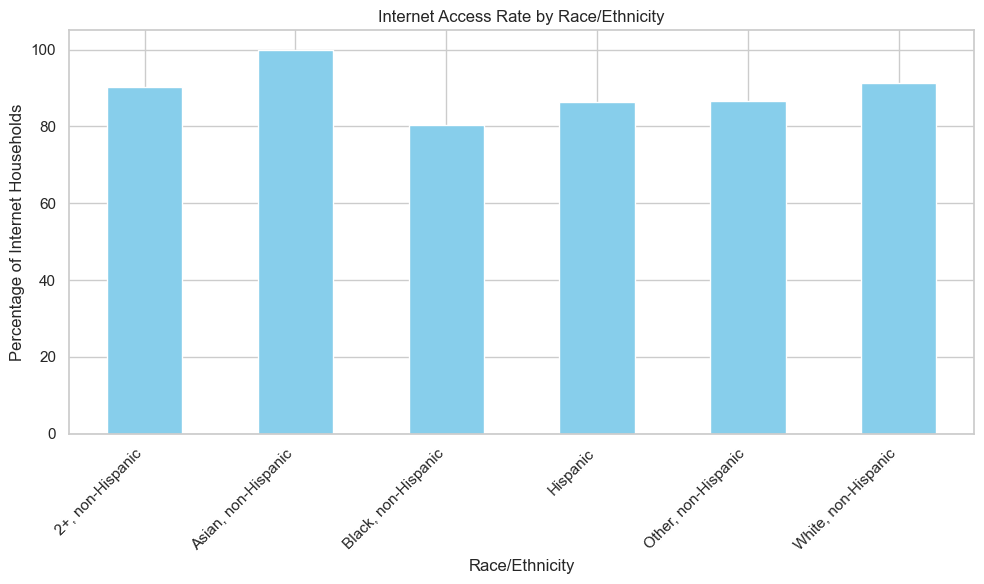

In [151]:
sns.set(style="whitegrid")

# Visualization 1: Using AARP Data to explore Internet Access Rate by Race/Ethnicity
plt.figure(figsize=(10, 6))
internet_access_by_race['Internet Household'].plot(kind='bar', color='skyblue')
plt.title('Internet Access Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage of Internet Households')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

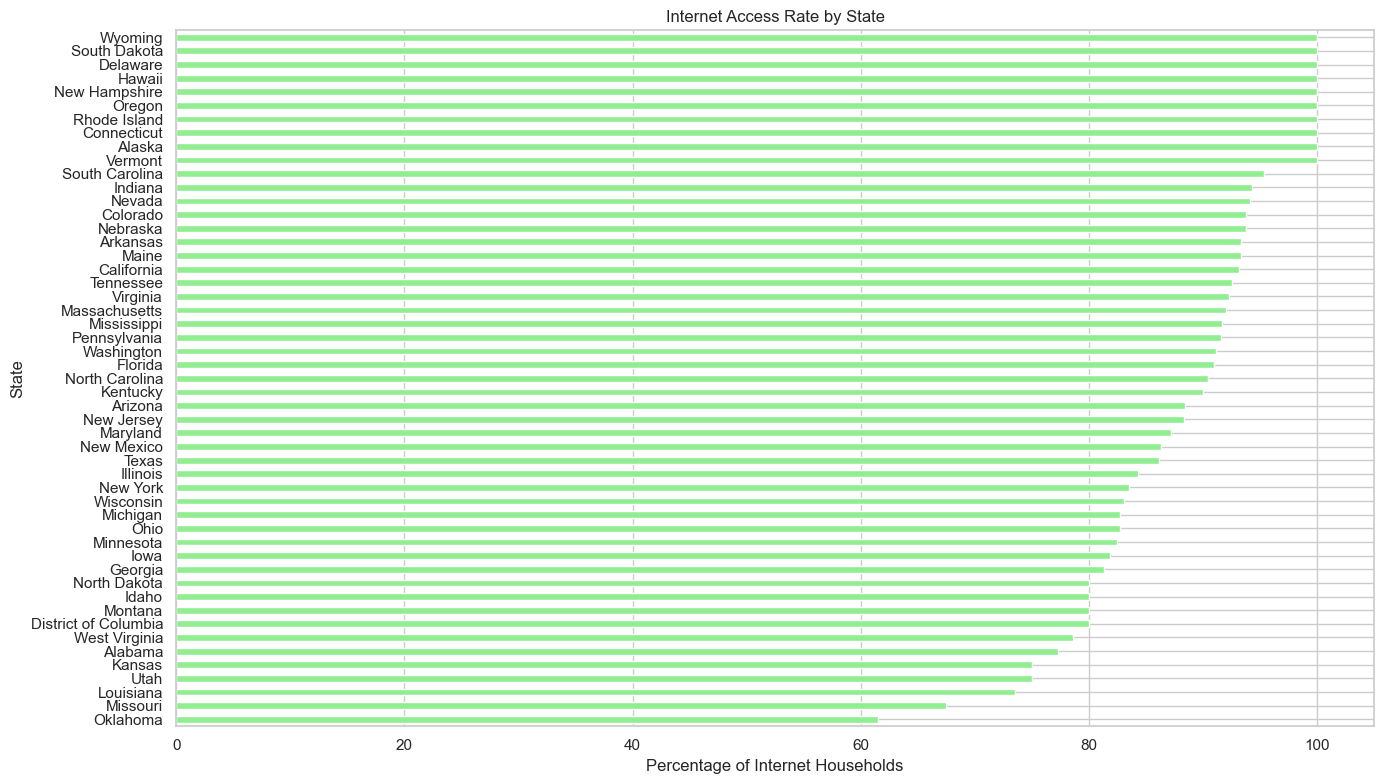

In [152]:
# Visualization 2: Using AARP Data to explore Internet Access Rate by state
plt.figure(figsize=(14, 8))
internet_access_by_state['Internet Household'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Internet Access Rate by State')
plt.xlabel('Percentage of Internet Households')
plt.ylabel('State')
plt.tight_layout()

plt.show()

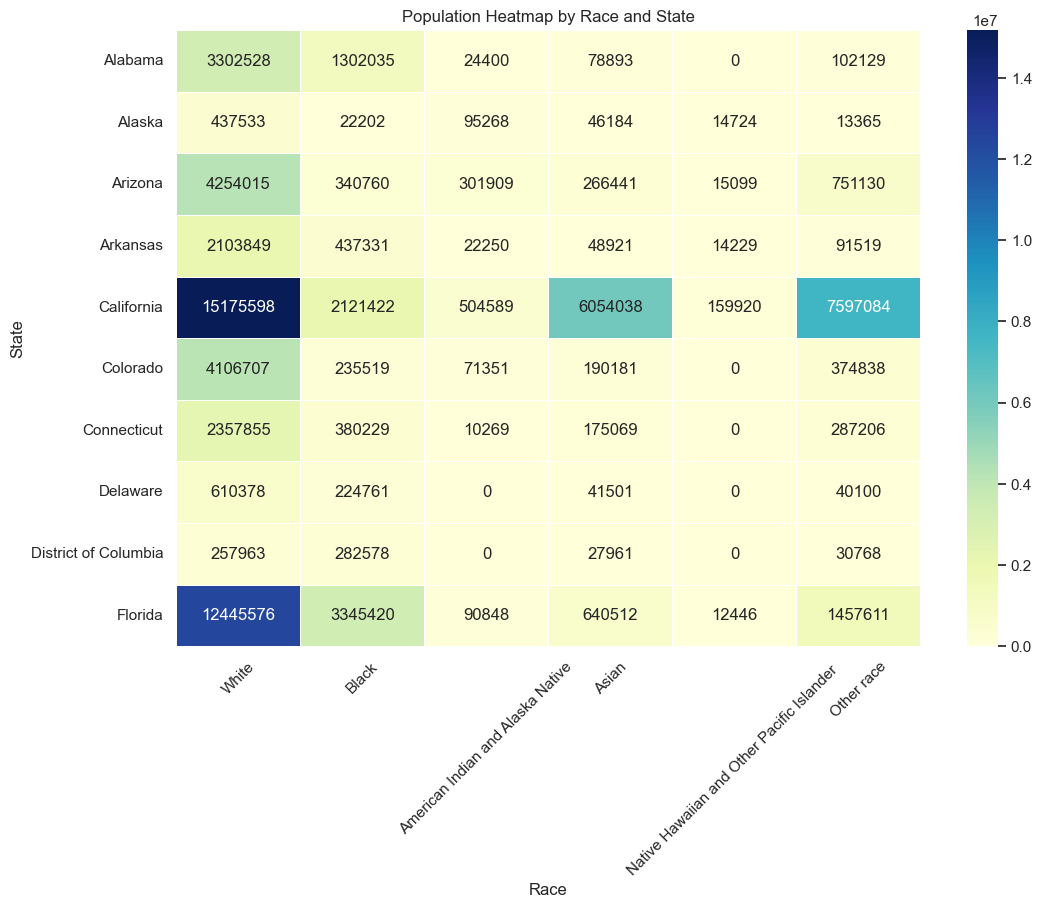

In [153]:
# Visualization 3: Visualization 3: Exploring Race Composition by State Using ACS 2022 Data
# Choose the first state as example. Replace None values with 0 to ensure numerical data for the heatmap. 
Sample = ACSRace.head(10)
selected_df = pd.DataFrame(Sample).set_index("NAME").fillna(0)

#Use Seaborn to create the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.drop(columns=['State Code']).astype(int), annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Population Heatmap by Race and State')
plt.xlabel('Race')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

Interpretation of the Data

1.1. From the pivot table analysis, it is observed that older adults living in metropolitan areas have a higher percentage of internet access. Among racial groups, Asian older adults have the highest percentage of internet access, while Black older adults have the lowest. Oklahoma, Missouri, Louisiana, Utah, and Kansas are the five states with the lowest percentage of internet access among older adults.

1.2. From the visualizations, the first two graphs align with the findings from the table, showing that Asian older adults have the highest percentage of internet access, and Black older adults have the lowest. Similarly, Oklahoma, Missouri, Louisiana, Utah, and Kansas are identified as the five states with the lowest percentage of internet access among older adults. The third graph, utilizing ACS 2022 data, visually explores the racial composition in 10 states, highlighting California's greater racial diversity compared to other states.


Research Question:
- Is there a disparity in internet access among older adults?

In the digital age, access to the internet has become a critical factor in determining the quality of life, influencing everything from social engagement to access to information and services. As such, disparities in internet access can significantly impact various demographics, particularly older adults. This research aims to delve into the question: Is there a disparity in internet access among older adults? By examining this issue, I hope to uncover patterns of inequality that may exist based on geographic location, socioeconomic status, race, or other factors.

The internet has proven to be a vital resource for health information, social connectivity, and even financial management. However, not all older adults have the same level of access to these digital benefits. Preliminary data suggests that there might be significant disparities in internet access among older adults, potentially leading to a digital divide within this demographic. Such a divide could exacerbate existing inequalities and limit the ability of some older adults to fully participate in increasingly digital societies.

Several factors might contribute to disparities in internet access among older adults. For instance, older adults in metropolitan areas may have higher internet access rates than those in rural areas due to better infrastructure and availability of services. Moreover, there might be racial disparities in internet access, with some racial groups having higher access rates than others. Economic factors also play a crucial role, as the cost of internet services and devices can be prohibitive for some older adults, limiting their ability to go online.

This research will investigate these disparities. By mapping out internet access rates among older adults across different states and analyzing access rates among different racial and socioeconomic groups, I aim to paint a comprehensive picture of the digital landscape faced by older adults in the United States. Understanding whether and where disparities in internet access among older adults exist is crucial for developing targeted interventions to bridge the digital divide. By ensuring equitable internet access, we can help older adults stay connected, informed, and engaged, ultimately improving their quality of life and participation in the digital world.

Research Plan:

3.1. Clean the data.

3.2. Conduct an analysis of older adults living in the US using ACS 2022 data:
- Create a map to visualize the distribution of older adults from each racial group across different states.

3.3. Visualize internet access among older adults living in the US using AARP Data:
- Create a map to visualize internet access among older adults in different states.
- Create a map to visualize internet access among older adults from different racial groups in various states (e.g., select Asian older adults and visualize their internet access compared to other racial groups' older adults in different states).

3.4. Conclude the analysis and wrap up the project.